<a href="https://colab.research.google.com/github/Usmantech125/digit-classification-pca/blob/main/digit_classification_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Pixel values of first digit (8x8):
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


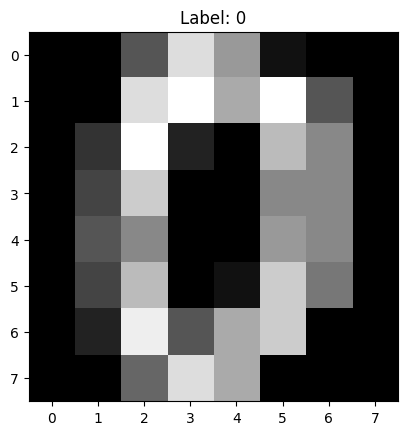

In [32]:
# 1. Dataset load karna
digits = load_digits()
X, y = digits.data, digits.target

print("Pixel values of first digit (8x8):")
print(digits.images[0])

plt.imshow(digits.images[0], cmap="gray")
plt.title(f"Label: {digits.target[0]}")
plt.show()


In [33]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
# 3. Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# 4. PCA apply karna (64 features -> 30 principal components)
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [36]:
# 5. Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# 6. Predictions aur accuracy
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with PCA: {accuracy:.2f}")

Model Accuracy with PCA: 0.96


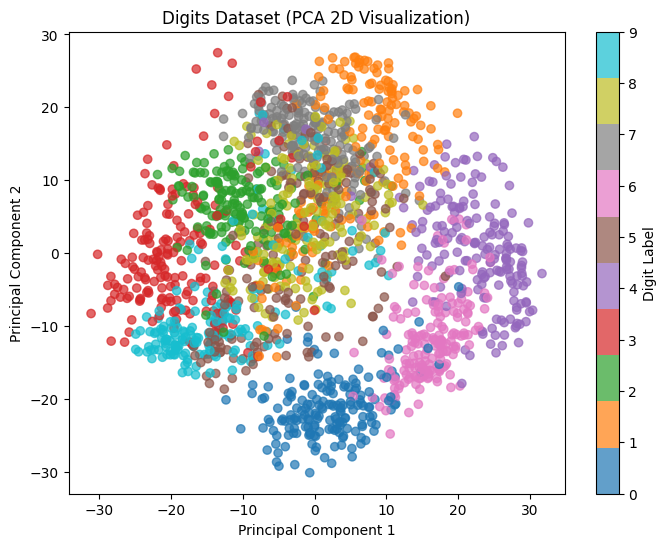

In [38]:
# 7. Visualization (2D PCA for plotting only)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Digits Dataset (PCA 2D Visualization)")
plt.show()